
# *Slickdeals Scraping and Analysis*
<p><a name="sections"></a></p>


# Sections

- <a href="#CL">Cleaning</a><br>
- <a href="#DA">Data Analysis <br>
    - <a href="#Stat"> Statistics and Plot</a><space>
    </a><br>






# Cleaning

<p><a name="CL"></a></p>
### Data

- The dataset are posts from the "Hot Deals" subforum of Slickdeals, which is what you see on the front page of slickdeals.net and more.
- Approx. **30K observations**
- Since these are forum posts, some posts need to be removed (ie. Forum Rules, "Please delete", etc.)



In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import decimal as D
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import calendar
from scipy.stats.stats import pearsonr
from IPython.display import HTML


In [2]:

#Read file with Pandas and store into df, then strip unicode
df = pd.read_csv("./slickdeals/slickdeals.csv",thousands=',') #Make sure to include thousands
df.DealTitle = df.DealTitle.str.strip()

#Slice out rows with null "DealTitle"s (Probably scraping error)
df = df[pd.notnull(df['DealTitle'])]


#Strip 'Comments' and 'DealPrice' from each column count cell and then convert it into a number in the next part
#Note: Regex won't play nice with DealPrice so I was unable to convert the column into numeric properly

df['Comments'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['Comments'] = df['Comments'].astype(int)

# df['DealPrice'] = df['DealPrice'].replace(regex = True,inplace=True, to_replace=r'\D', value=r'')
# df.DealPrice = df['DealPrice'].str.replace("Free", "")
# df.DealPrice = df['DealPrice'].str.replace("[$,]", "")
# df.DealPrice = df['DealPrice'].str.replace("\D[!\.]","")


#Convert relevant columns to Int. NaN is denoted by -1 
fna1 = ['ViewCount', 'DealScore', 'DealsPosted','Rep'] #Replaces NaN with -1 to allow dtype int

df.loc[:,fna1] = df.loc[:,fna1].fillna(-1)

for l in fna1:
    df[l] = df[l].astype(int) 

    
#Take out rows with -1 in DealScore
df = df[df.DealScore != -1]

#But we want to use what is available on 'DealsPosted' and 'Rep' for summary statistics,
# so we need to convert the -1's back to nulls:
df['Rep'] = df['Rep'].replace('-1', None)
df['DealsPosted'] = df['DealsPosted'].replace('-1', None)

    
#Take out FAQ/Rules Pages, Deleted Pages
junkthreads = ['RULES', 'FAQ', 'PLEASE', 'DELETE', 'PSA']
df = df[df.DealTitle.str.contains('|'.join(junkthreads), case=False)==False]


#Use Pandas.to_datetime and dt.Strftime to get the desired 24-hour time format without AM/PM
df['Date']= pd.to_datetime(df['Date'])
df['Time']= pd.to_datetime(df['Time'])
df['dtime'] = df['Time']
df['Time']= df['Time'].dt.strftime("%H:%M")

#Removed Posts with Null StoreNames and Categories
df=df[pd.notnull(df['StoreName'])]
df=df[pd.notnull(df['Category'])]

In [3]:
#Drop Duplicates
df = df.drop_duplicates()

#Resulting Table

df

,Category,ViewCount,DealsPosted,DealScore,StoreName,DealTitle,Image,Time,Comments,DealPrice,Poster,Date,Rep,dtime
1,Babies,47086,5015,91,Target,"Target: Purchase $100 in Baby Diapers, Wipes &...","<img src=""https://static.slickdealscdn.com/att...",10:08,58,Free,persian_mafia,2017-04-21,62207,2017-05-08 10:08:00
3,Pet Care & Supplies,23172,5015,77,Target,19lbs. Arm & Hammer Slide Easy Clean Up Multi-...,"<img src=""https://static.slickdealscdn.com/att...",19:51,67,Free,persian_mafia,2017-03-21,62207,2017-05-08 19:51:00
4,Computer Accessories,35343,1,192,Corsair,Corsair AM4-AMD Bracket Kit for Hydro Series C...,"<img src=""https://static.slickdealscdn.com/att...",14:20,104,Free,CoolWhippy,2017-02-28,109,2017-05-08 14:20:00
5,"Men's Clothing, Shoes & Accessories",40070,16,94,JCPenney,JCPenney Coupon Giveaway: $10 Off $10+,"<img src=""https://static.slickdealscdn.com/att...",10:52,56,Free,luscombe1310,2017-04-20,484,2017-05-08 10:52:00
6,Video Games,19973,0,224,Steam,Saints Row 2 (PC Digital Download),"<img src=""https://static.slickdealscdn.com/att...",02:14,48,Free,fantasydragon,2017-04-20,165,2017-05-08 02:14:00
8,Antivirus Software,17611,628,45,Newegg,Internet Software: Kaspersky Total Security 20...,"<img src=""https://static.slickdealscdn.com/att...",23:01,48,Free,bb989,2017-04-05,4871,2017-05-08 23:01:00
9,Cable TV,86820,130,51,Roku,Xfinity TV Beta App for Roku,"<img src=""https://static.slickdealscdn.com/att...",16:35,321,Free,AdyM,2017-01-31,1852,2017-05-08 16:35:00
10,Credit Cards,65902,1,112,Discover.com,College Student Discover it Cardholders: $20 C...,"<img src=""https://static.slickdealscdn.com/att...",17:40,98,Free,hvenkatramanan,2017-02-09,38,2017-05-08 17:40:00
11,Video Games,78055,52,308,Xbox.com,Xbox Digital Games: Evolve Ultimate Edition or...,"<img src=""https://static.slickdealscdn.com/att...",07:04,146,Free,DrNotSoHorrible,2017-02-22,1074,2017-05-08 07:04:00
12,Photo Prints & Greeting Cards,59543,63,229,CVS Photo,"CVS 8""x10"" Photo Print","<img src=""https://static.slickdealscdn.com/att...",05:36,102,Free,ninjastyle,2017-02-13,727,2017-05-08 05:36:00


- I edited out 'Yesterday' and 'Today' and replaced them with Excel. However, there is definitely a way to do this without resorting to Excel. One of the methods I found after I had already did my editing is that you can assign 'Yesterday' and 'Today' as variables with ***datetime.now()*** and ***timedelta***. 



# Data Analysis

<p><a name="DA"></a></p>





## Summary Statistics:
<p><a name="Stat"> </a></p>

In [4]:
dfstats = pd.DataFrame(df.describe())
dfstats = dfstats.transpose()
# temp = pd.DataFrame({'Median':df.median()})
# dfstats = pd.concat([dfstats,temp], axis=1)
print "Dimensions:", df.shape
dfstats

Dimensions: (19847, 14)


,count,mean,std,min,25%,50%,75%,max
ViewCount,19847.0,8660.705195,48576.093088,107.0,890.5,1411.0,3745.0,3079768.0
DealsPosted,19847.0,2116.984784,4133.443229,0.0,12.0,85.0,1989.0,25594.0
DealScore,19847.0,12.572278,50.385418,-207.0,0.0,1.0,6.0,2047.0
Comments,19847.0,23.908349,161.301602,0.0,0.0,2.0,10.0,8547.0
Rep,19847.0,21022.447272,36845.222178,10.0,122.0,1031.0,15409.0,135155.0


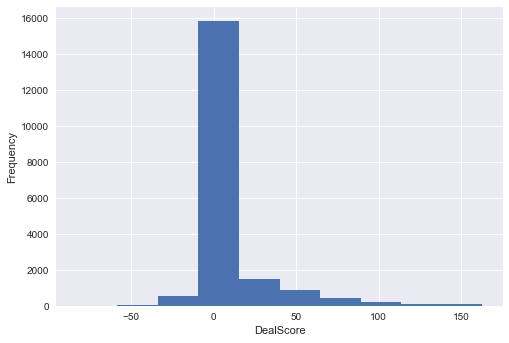

In [5]:
# plt.hist(df['DealScore'],bins = 50)
# plt.ylabel('Frequency')
# plt.xlabel('DealScore')
# plt.ylim(0,500)

#Histogram with outliers greater than 3 test scores away removed
histdf_dsc = df[['DealScore']]
histdf_dsc = histdf_dsc.loc[histdf_dsc.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
plt.hist(histdf_dsc['DealScore'])
plt.ylabel('Frequency')
plt.xlabel('DealScore')

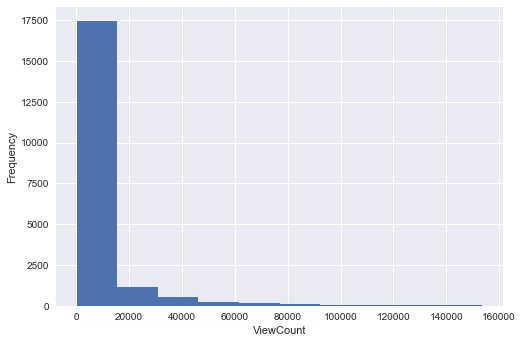

In [6]:
# Histogram without removing outliers
# plt.hist(df['ViewCount'],bins = 100)
# plt.ylabel('Frequency')
# plt.xlabel('ViewCount')
# plt.xlim(0,1000000)

#Histogram with outliers greater than 3 test scores away removed
histdf_vc = df[['ViewCount']]
histdf_vc = histdf_vc.loc[histdf_vc.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
plt.hist(histdf_vc['ViewCount'])
plt.ylabel('Frequency')
plt.xlabel('ViewCount')

(0, 1000)

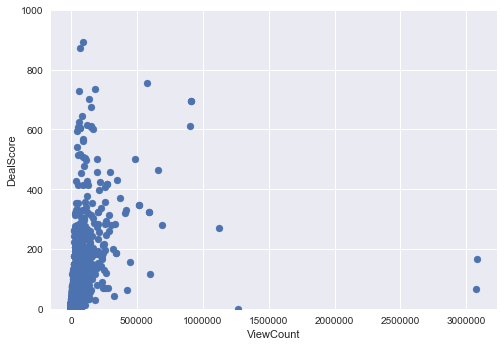

In [7]:
plt.scatter(df.ViewCount,df.DealScore)
plt.xlabel("ViewCount")
plt.ylabel("DealScore")
plt.ylim(0,1000)



*Pearson R*
(Correlation Strength, Chance of no correlation)

In [8]:
pearsonr(df.ViewCount,df.DealScore)

(0.55388584147457109, 0.0)

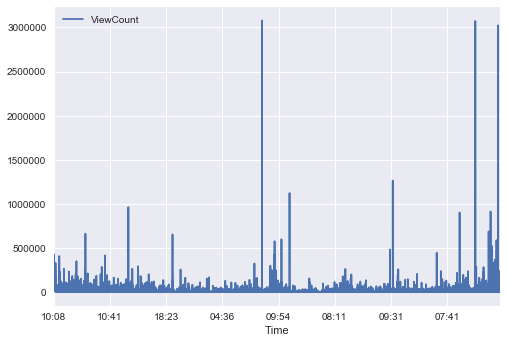

In [9]:
df.plot(x='Time', y='ViewCount')
plt.show()

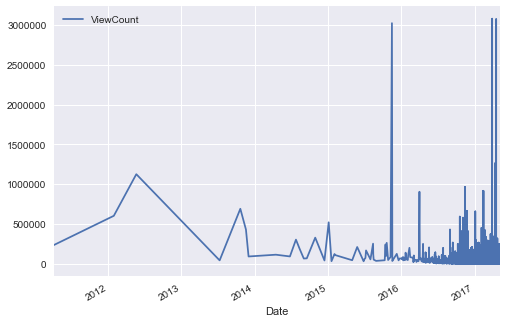

In [10]:
df.plot(x='Date', y = 'ViewCount')


## Categorical Graphs

<br><br>

*Too Many Categories!*

In [11]:
print "Stores:", len(df.StoreName.unique())
print "Categories:", len(df.Category.unique())
print "Posters:", len(df.Poster.unique())

Stores: 990
Categories: 383
Posters: 7327


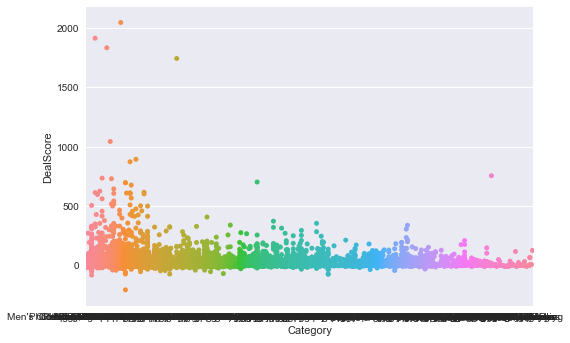

In [12]:
sns.stripplot(x="Category", y="DealScore", data=df);

<space><p>
As you can see, there are way too many stores and categories to make a meaningful observation if you use all the categories, so I'll go ahead and show the top 10 of each factor set (Category and StoreName).
</p><space>

<br>
*Category and ViewCount*

In [13]:
df.groupby('Category').ViewCount.sum().sort_values(ascending=False)[:10]

Category
Smartphones                      11109294
Tech & Electronics                7200235
Credit Cards                      7113464
Home & Home Improvement           6399170
Cell Phone Plans & Services       5655155
Computers                         5007722
Clothing, Shoes & Accessories     4477286
Laptops                           4445464
Tools                             4147710
Video Games                       3512519
Name: ViewCount, dtype: int32

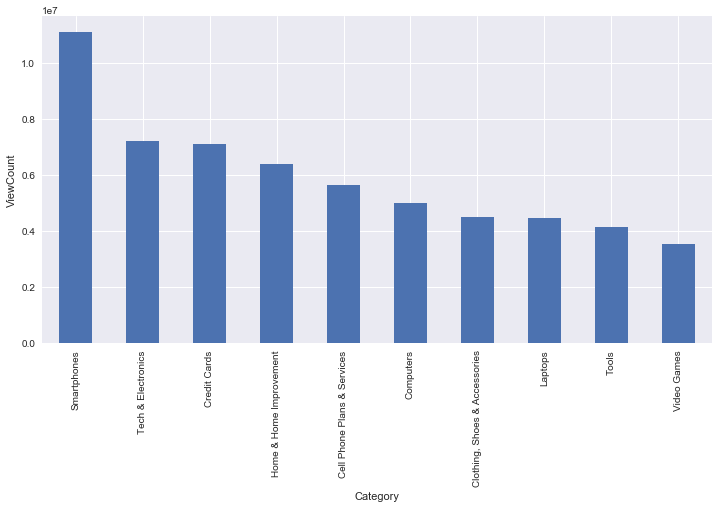

In [14]:
plt.figure(figsize=(12,6))
df.groupby('Category')['ViewCount'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('ViewCount')

<br>
*StoreName and ViewCount*

In [15]:
df.groupby('StoreName').ViewCount.sum().sort_values(ascending=False)[:10]

StoreName
Amazon                     28094942
Walmart                    14124492
Best Buy                   10657019
Chase - Bank Advertiser     6383890
Newegg                      6054180
T-Mobile                    5495666
Sam's Club                  4974146
Costco Wholesale            4923296
Target                      4718877
Home Depot                  4074312
Name: ViewCount, dtype: int32

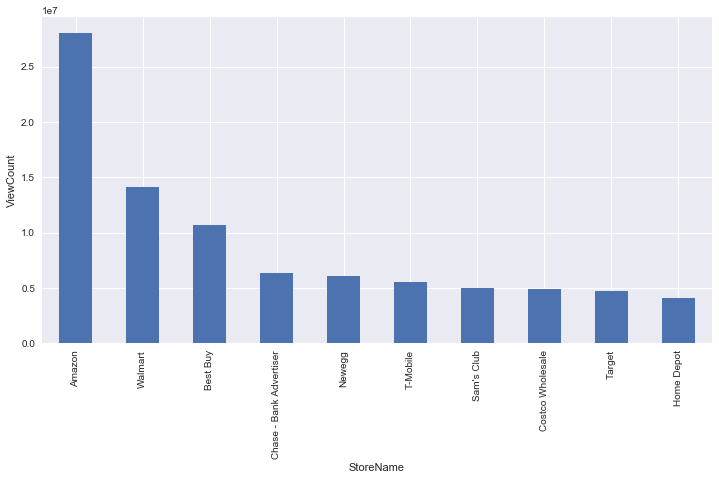

In [16]:
plt.figure(figsize=(12,6))
df.groupby('StoreName')['ViewCount'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('ViewCount')

<br>
*Category and DealScore*

In [17]:
df.groupby('Category').DealScore.sum().sort_values(ascending=False)[:10]

Category
Home & Home Improvement          8191
Video Games                      7133
Smartphones                      6693
Tools                            6122
Computer & PC                    5505
Clothing, Shoes & Accessories    5362
Tech & Electronics               5215
Digital Movie Download           4969
Credit Cards                     4916
Blu-ray                          4684
Name: DealScore, dtype: int32

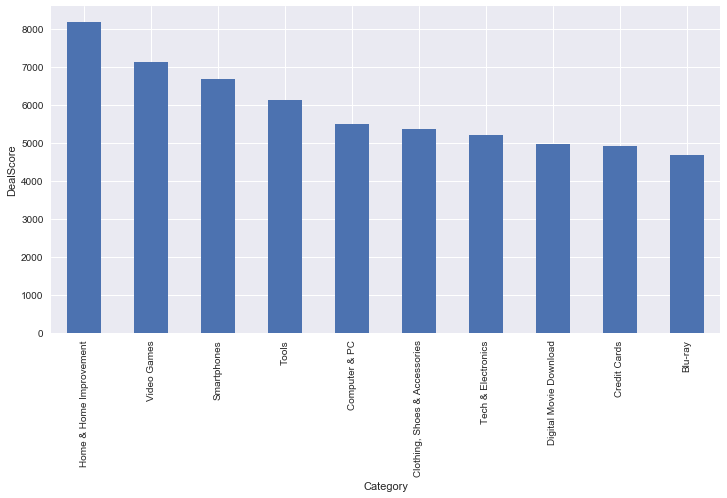

In [18]:
plt.figure(figsize=(12,6))
df.groupby('Category')['DealScore'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('DealScore')

<br>
*StoreName and DealScore*

In [19]:
df.groupby('StoreName').DealScore.sum().sort_values(ascending=False)[:10]

StoreName
Amazon              48253
Walmart             19524
Best Buy            15834
Newegg              10682
Target               6704
Microsoft Store      6616
eBay                 5844
Costco Wholesale     5790
T-Mobile             5544
Home Depot           5289
Name: DealScore, dtype: int32

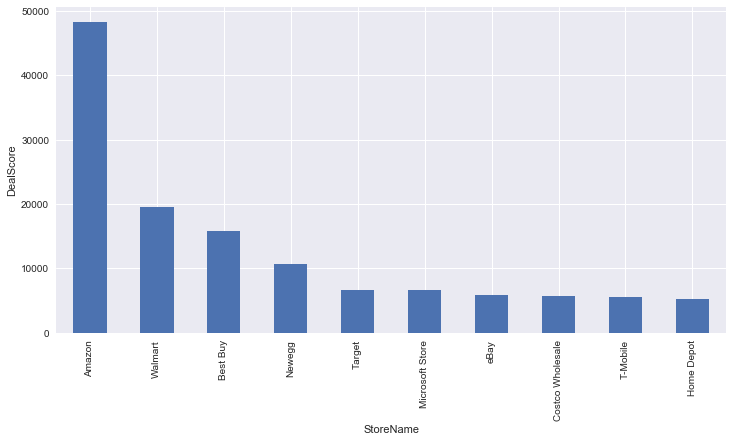

In [20]:
plt.figure(figsize=(12,6))
df.groupby('StoreName')['DealScore'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('DealScore')

Mean

In [32]:
df.groupby('StoreName').DealScore.mean().sort_values(ascending=False)[:10]

StoreName
Windscribe      676.000000
UbiShop         625.000000
Origins         516.000000
Adobe           502.000000
PayPal.com      489.333333
Bing Rewards    420.500000
Uber            377.000000
Slickdeals      356.000000
TaxAct          324.500000
CreditKarma     304.500000
Name: DealScore, dtype: float64

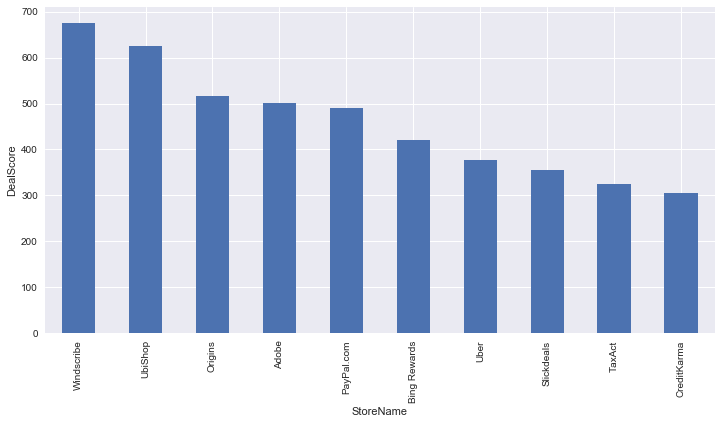

In [33]:
plt.figure(figsize=(12,6))
df.groupby('StoreName')['DealScore'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('DealScore')

In [32]:
df.groupby('StoreName').ViewCount.mean().sort_values(ascending=False)[:10]

StoreName
Windscribe      676.000000
UbiShop         625.000000
Origins         516.000000
Adobe           502.000000
PayPal.com      489.333333
Bing Rewards    420.500000
Uber            377.000000
Slickdeals      356.000000
TaxAct          324.500000
CreditKarma     304.500000
Name: DealScore, dtype: float64

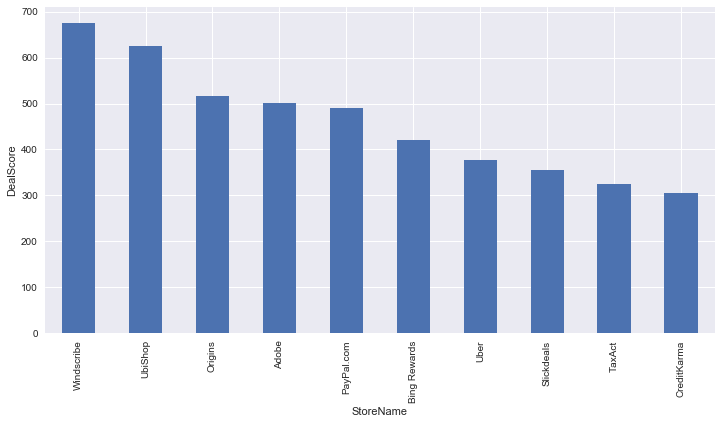

In [33]:
plt.figure(figsize=(12,6))
df.groupby('StoreName')['DealScore'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('DealScore')

In [21]:
df['StoreName'].value_counts()[:10]

Amazon              5417
Walmart             1726
Newegg              1177
Best Buy             916
eBay                 793
Target               446
Frys                 373
Home Depot           352
Costco Wholesale     333
Groupon              251
Name: StoreName, dtype: int64

In [28]:
storescore = df.groupby('StoreName').DealScore.sum()/df['StoreName'].value_counts()

storescore.sort_values(ascending=False)[:10]

Windscribe      676.000000
UbiShop         625.000000
Origins         516.000000
Adobe           502.000000
PayPal.com      489.333333
Bing Rewards    420.500000
Uber            377.000000
Slickdeals      356.000000
TaxAct          324.500000
CreditKarma     304.500000
dtype: float64

In [ ]:
df['Poster'].value_counts()[:10]